In [2]:
import warnings
warnings.simplefilter('ignore')

In [1]:
import pandas as pd
import numpy as np
import click
import logging as LOGGER
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from matplotlib.backends.backend_pdf import PdfPages

from src.data.data import create_directory

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

LOGGER.basicConfig(format="%(asctime)s %(levelname)s %(message)s", level=LOGGER.INFO)

def get_files(glob_):
    res = glob(glob_)
    if res:
        return res
    raise ValueError(f"No matches for {glob_}")

def read_multiple_csvs(files):
    dfs = []
    for i in files:
        dfs.append(pd.read_csv(i))
    LOGGER.info("Concatenating metrics ...")
    return pd.concat(dfs)


## Netflow - Machine Learning - 1 Seconds

In [29]:
results = read_multiple_csvs(get_files("../final_output/ml_ddos_1s/*/metrics.csv"))
results.model = results.model.str.replace('logistic_', 'logistic')
results.model = results.model.str.replace('random_', 'random')
results['model_name'] = results.model.apply(lambda x: x.split('_')[1])
results['steps'] = results.model.apply(lambda x: int(x.split('_')[3].split('s')[0]))
results = results[results.steps <= 200]
results = results.sort_values('steps')
results_binary = results[np.logical_not(results.model.str.contains('transition'))]
results_transitional = results[results.model.str.contains('transition')]

2019-10-23 21:08:43,945 INFO Concatenating metrics ...


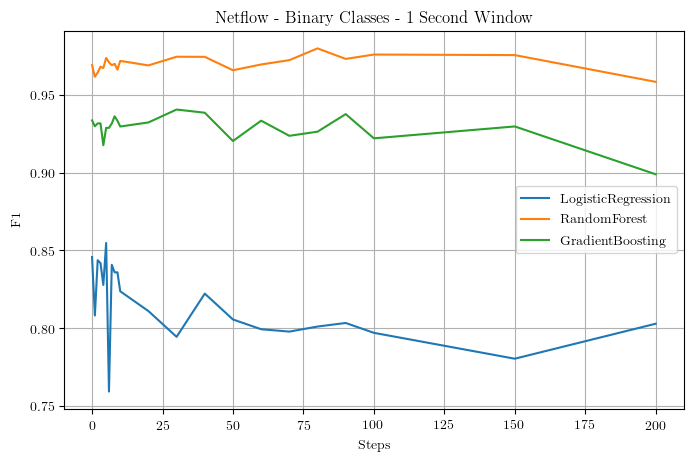

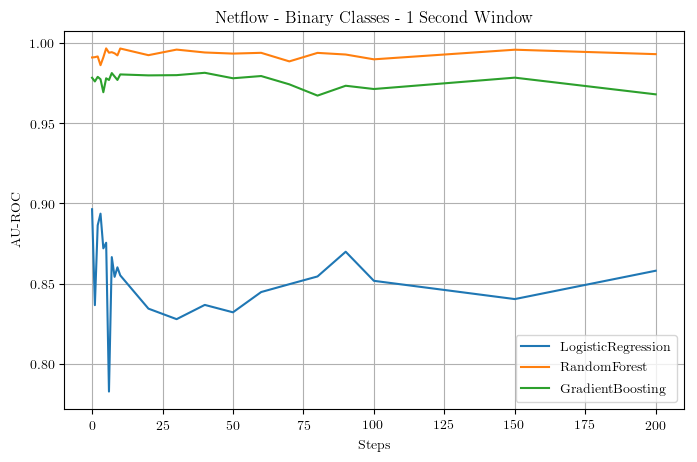

In [44]:
temp = results_binary.set_index('model_name')
metrics = ['f1', 'au-roc']
for m in metrics:
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')
    plt.title('Netflow - Binary Classes - 1 Second Window')

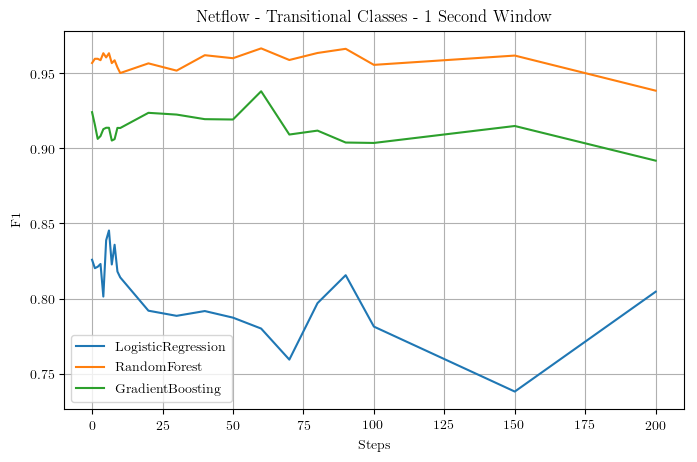

In [48]:
temp = results_transitional.set_index('model_name')
metrics = ['f1']
for m in metrics:
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')
    plt.title('Netflow - Transitional Classes - 1 Second Window')

0.9867349128378305

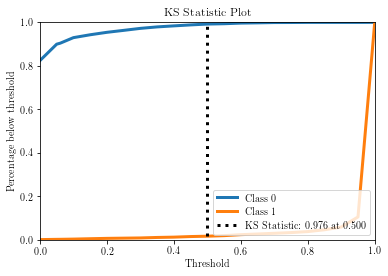

In [33]:
from sklearn.metrics import f1_score
import scikitplot as skplt
tt = pd.read_parquet('../final_output_ml/ml_ddos_1s/netflow_random_forest_fast_10steps_binary/test_set.parquet')
skplt.metrics.plot_ks_statistic(tt.y_true, tt[['y_pred_prob_0', 'y_pred_prob_1']].values)
f1_score(tt.y_true, tt.y_pred_prob_1 > 0.502, average='macro')

0.3768039267067712

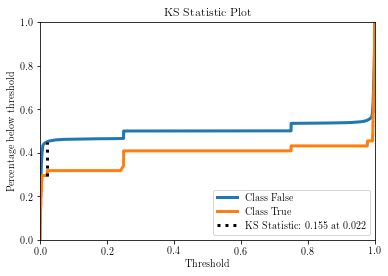

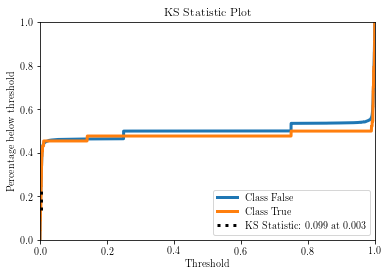

In [35]:
from sklearn.metrics import f1_score
import scikitplot as skplt
tt = pd.read_parquet('../final_output_ml/ml_ddos_1s/netflow_logistic_regression_fast_10steps_transition/test_set.parquet')
skplt.metrics.plot_ks_statistic(tt.y_true == 2, np.array([1-tt.y_pred_prob_2, tt.y_pred_prob_2]).reshape(-1, 2))
skplt.metrics.plot_ks_statistic(tt.y_true == 1, np.array([1-tt.y_pred_prob_1, tt.y_pred_prob_1]).reshape(-1, 2))
tt['y_pred2'] = tt.apply(lambda x: 1 if x['y_pred_prob_1'] > 0.022 else 2 if x['y_pred_prob_2'] > 0.003 else x['y_pred'], axis=1)
f1_score(tt.y_true, tt.y_pred, average='macro')

## Netflow - Machine Learning - 0.1 Seconds

In [32]:
results = read_multiple_csvs(get_files("../final_output/ml_ddos_0.1s/*/metrics.csv"))
results.model = results.model.str.replace('logistic_', 'logistic')
results.model = results.model.str.replace('random_', 'random')
results['model_name'] = results.model.apply(lambda x: x.split('_')[1])
results['steps'] = results.model.apply(lambda x: int(x.split('_')[3].split('s')[0]))
results = results[results.steps <= 200]
results = results.sort_values('steps')
results_binary = results[np.logical_not(results.model.str.contains('transition'))]
results_transitional = results[results.model.str.contains('transition')]

2019-10-23 21:08:45,293 INFO Concatenating metrics ...


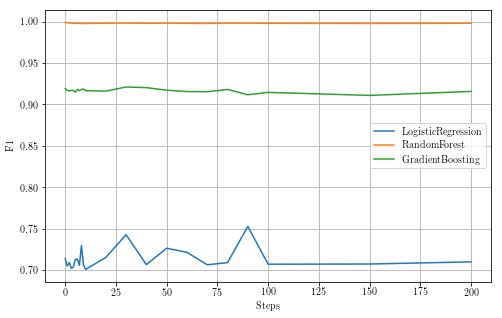

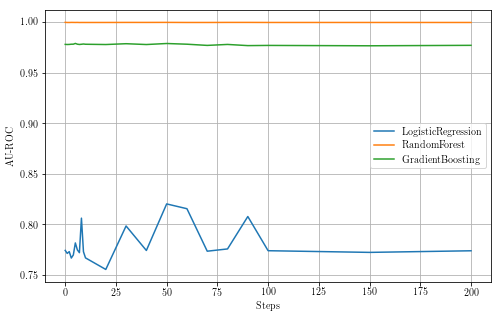

In [33]:
temp = results_binary.set_index('model_name')
metrics = ['f1', 'au-roc']
for m in metrics:
    plt.figure(figsize=(8,5))
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')

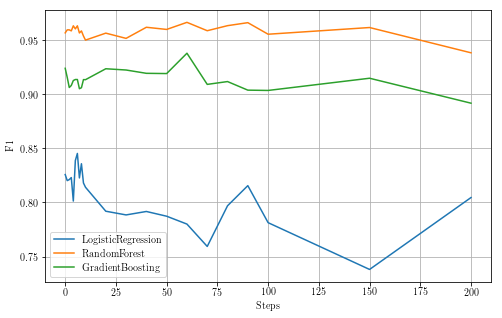

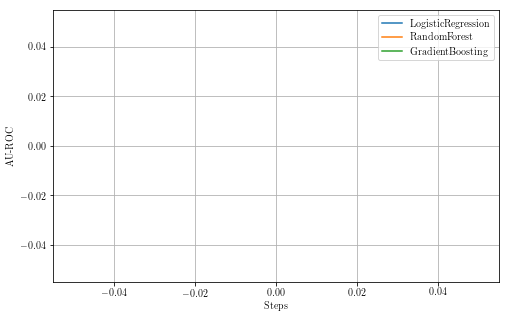

In [38]:
temp = results_transitional.set_index('model_name')
metrics = ['f1', 'au-roc']
for m in metrics:
    plt.figure(figsize=(8,5))
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')

## Netflow - Machine Learning - 10 Seconds

In [35]:
results = read_multiple_csvs(get_files("../final_output/ml_ddos_10s/*/metrics.csv"))
results.model = results.model.str.replace('logistic_', 'logistic')
results.model = results.model.str.replace('random_', 'random')
results['model_name'] = results.model.apply(lambda x: x.split('_')[1])
results['steps'] = results.model.apply(lambda x: int(x.split('_')[3].split('s')[0]))
results = results[results.steps <= 200]
results = results.sort_values('steps')
results_binary = results[np.logical_not(results.model.str.contains('transition'))]
results_transitional = results[results.model.str.contains('transition')]

2019-10-23 21:08:46,709 INFO Concatenating metrics ...


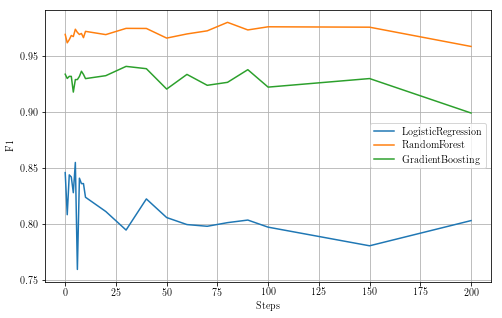

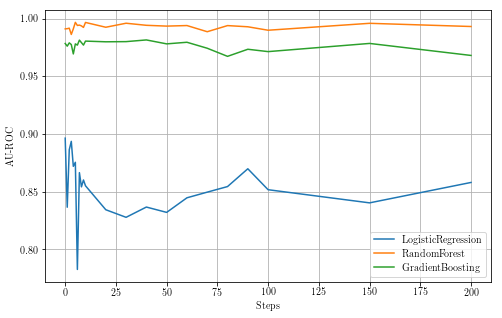

In [36]:
temp = results_binary.set_index('model_name')
metrics = ['f1', 'au-roc']
for m in metrics:
    plt.figure(figsize=(8,5))
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')

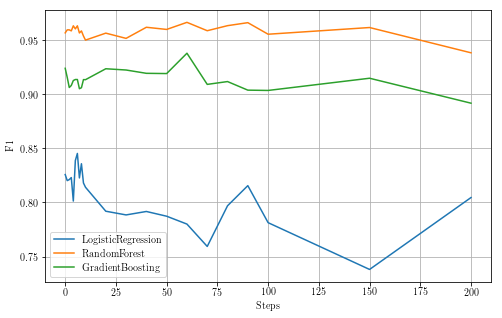

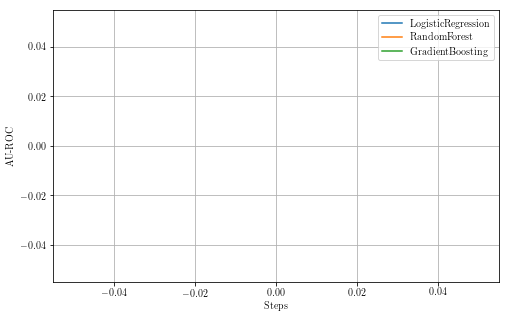

In [37]:
temp = results_transitional.set_index('model_name')
metrics = ['f1', 'au-roc']
for m in metrics:
    plt.figure(figsize=(8,5))
    plt.plot(temp.steps.unique(), temp.ix['logisticregression'][m], label='LogisticRegression')
    plt.plot(temp.steps.unique(), temp.ix['randomforest'][m], label='RandomForest')
    plt.plot(temp.steps.unique(), temp.ix['xgboost'][m], label='GradientBoosting')
    plt.legend()
    plt.grid()
    plt.ylabel(f'{m.upper()}')
    plt.xlabel('Steps')